In [1]:
import numpy as np
import matplotlib.pyplot as plt

## linear grid spacing

In [2]:
# def Poisson_FDM(f, dx, dy, max_iterations=10000, tolerance=1e-5, omega=1.0):
#     '''
#     omega: Successive Over-Relaxation (SOR) factor
#     '''
#     # Initialize the solution array
#     ny, nx = f.shape
#     E = np.zeros((ny, nx))
    
#     # Finite Difference Method (FDM) loop
#     for iteration in range(max_iterations):
        
#         E_new = np.copy(E)
        
#         # Update the interior points using the finite difference approximation
#         for i in range(1, ny-1):
#             for j in range(1, nx-1):
#                 E_new[i, j] = (1 - omega) * E[i, j] + (omega / 4) * (
#                     E[i+1, j] + E[i-1, j] + E[i, j+1] + E[i, j-1] - dx*dy * f[i, j]
#                 )
        
#         # Check for convergence
#         eps = np.linalg.norm(E_new - E, ord=np.inf)
#         if eps < tolerance:
#             #print(eps)
#             print(f'Converged after {iteration+1} iterations.')
#             break
            
#         E = E_new
#     return E

# def forward_laplacian(E, dx, dy):
#     """
#     Calculate the forward Laplacian of a 2D scalar field E using finite difference method.
    
#     Parameters:
#     E  : 2D array of scalar field values
#     dx : Grid spacing in x direction
#     dy : Grid spacing in y direction
    
#     Returns:
#     Laplacian of E (2D array)
#     """
#     ny, nx = E.shape
#     laplacian_E = np.zeros_like(E)
    
#     for i in range(1, ny-1):
#         for j in range(1, nx-1):
#             laplacian_E[i, j] = (
#                 (E[i+1, j] - 2*E[i, j] + E[i-1, j]) / dx**2 +
#                 (E[i, j+1] - 2*E[i, j] + E[i, j-1]) / dy**2
#             )
    
#     return laplacian_E

## nonlinear grid spcaing

In [12]:
# def Poisson_FDM(f, dx, dy, max_iterations=10000, tolerance=1e-6, omega=1.0):
#     ny, nx = f.shape
#     E = np.zeros((ny, nx))
    
#     for iteration in range(max_iterations):
#         E_new = np.copy(E)
        
#         for i in range(1, ny-1):
#             for j in range(1, nx-1):
#                 dx_avg = (dx[i, j] + dx[i, j+1]) / 2
#                 dy_avg = (dy[i, j] + dy[i+1, j]) / 2
                
#                 E_new[i, j] = (1 - omega) * E[i, j] + omega * (
#                     (E[i+1, j] + E[i-1, j]) / dy_avg**2 +
#                     (E[i, j+1] + E[i, j-1]) / dx_avg**2 -
#                     f[i, j]
#                 ) / (2/dx_avg**2 + 2/dy_avg**2)
        
#         E_new[0, :] = E_new[-1, :] = E_new[:, 0] = E_new[:, -1] = 0
        
#         if np.max(np.abs(E_new - E)) < tolerance:
#             print(f'Converged after {iteration+1} iterations.')
#             break
        
#         E = E_new
    
#     return E

def Poisson_FDM(f, dx, dy, max_iterations=10000, tolerance=1e-6, omega=1.0):
    ny, nx = f.shape
    E = np.zeros((ny, nx))
    
    for iteration in range(max_iterations):
        E_new = np.copy(E)
        
        dx_avg = (dx[1:-1, 1:-1] + dx[1:-1, 2:]) / 2
        dy_avg = (dy[1:-1, 1:-1] + dy[2:, 1:-1]) / 2
        
        dy_avg2 = dy_avg**2
        dx_avg2 = dx_avg**2
        
        # Corrected denom calculation
        denom = 2/dx_avg2 + 2/dy_avg2
        
        E_new[1:-1, 1:-1] = (1 - omega) * E[1:-1, 1:-1] + omega * (
            (E[2:, 1:-1] + E[:-2, 1:-1]) / dy_avg2 +
            (E[1:-1, 2:] + E[1:-1, :-2]) / dx_avg2 -
            f[1:-1, 1:-1]
        ) / denom
        
        E_new[0, :] = E_new[-1, :] = E_new[:, 0] = E_new[:, -1] = 0
        
        if np.max(np.abs(E_new - E)) < tolerance:
            print(f'Converged after {iteration+1} iterations.')
            break
        
        E = E_new
    
    return E


def forward_laplacian(E, dx, dy):
    ny, nx = E.shape
    laplacian_E = np.zeros_like(E)
    
    for i in range(1, ny-1):
        for j in range(1, nx-1):
            dx_avg = (dx[i, j] + dx[i, j+1]) / 2
            dy_avg = (dy[i, j] + dy[i+1, j]) / 2
            
            laplacian_E[i, j] = (
                (E[i+1, j] - 2*E[i, j] + E[i-1, j]) / dy_avg**2 +
                (E[i, j+1] - 2*E[i, j] + E[i, j-1]) / dx_avg**2
            )
    
    return laplacian_E

# Define the grid
ny, nx = 25, 50
ly, lx = 1.0, 1.0

# Create grid
x = np.linspace(0, lx, nx)
y = np.linspace(0, ly, ny)
X, Y = np.meshgrid(x, y)

# Calculate dx and dy
dx = np.gradient(X, axis=1)
dy = np.gradient(Y, axis=0)

# Define the source term f (Gaussian distribution)
sigma = 0.1
f = np.exp(-((X - lx/2)**2 + (Y - ly/2)**2) / (2 * sigma**2))

# Normalize the source term
f /= np.max(f)

# Solve the Poisson equation
E_recover = Poisson_FDM(f, dx, dy)

# Calculate the Laplacian of the recovered field E
laplacian_E = forward_laplacian(E_recover, dx, dy)

Converged after 1101 iterations.


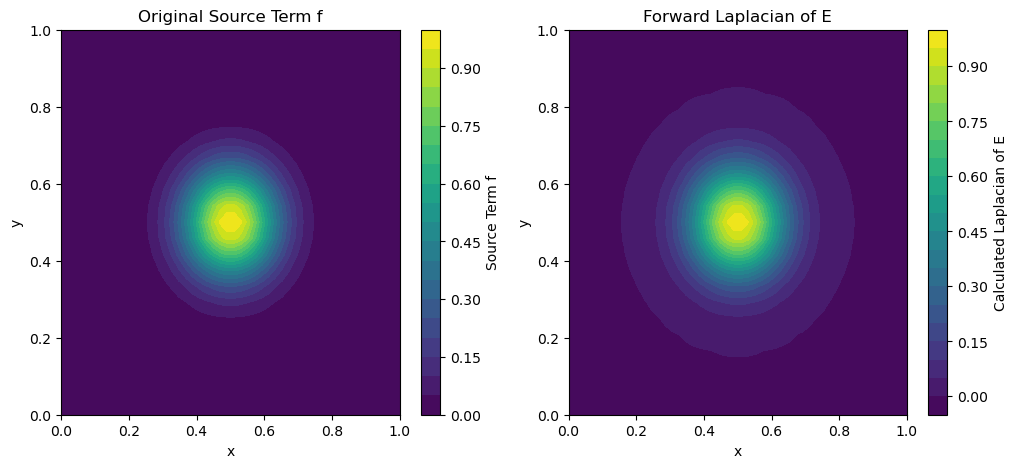

In [13]:
# Plot the original source term f and the calculated Laplacian to compare
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(X, Y, f, 20, cmap='viridis')
plt.colorbar(label='Source Term f')
plt.title('Original Source Term f')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.contourf(X, Y, laplacian_E, 20, cmap='viridis')
plt.colorbar(label='Calculated Laplacian of E')
plt.title('Forward Laplacian of E')
plt.xlabel('x')
plt.ylabel('y')

plt.show()